<h1>Coursera IBM Applied Data Science Capstone Project</h1>

<h3>This Jupyter Notebook will be mainly used for the capstone project.</h3>

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn import metrics
%matplotlib inline

print("Hello Capstone Project Course!")

Hello Capstone Project Course!


<h2>Introduction</h2>
<p>Road accidents have always been an unsolved puzzle in the history of transportation. Road accidents have bad effects on various areas of life. A road accident can lead to physical damage to the victims and at times, it can lead to loss of lives. In the business perspective, road accidents result in damage of goods and delays in delivery of services. For the government, road accidents lead to huge traffic blocks. Public properties like the roads, pavements, etc., also get damaged due to the road accidents. To avoid more accidents, it will be helpful if the accident severity at various locations of the city of Seattle can be predicted based on the previous data so that the travelers can avoid the locations or at least, take care while they drive through the locations with high severity of accidents.

All the stake holders including the travelers, the government and the people who live near those locations of Seattle city show their interest to know the predicted severity of accidents so that they would cooperate with each other to resolve the issues in locations according to the predicted severity of accidents and make them safer for travel. Government can plan new infrastructure in those locations to avoid accidents.
</p>

<h2>Data</h2>
<p>The dataset provided in the Capstone course is used to build a good machine learning model that can predict the accidents’ severity of a location based on various attributes. The data is downloaded from <a href="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv">here</a>.</p>

In [2]:
dataLink = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"

In [3]:
#Let's import the Seattle collision data into a dataframe.
df_collision = pd.read_csv(dataLink)
df_collision.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


<h2>Exploratory Data Analysis</h2>

I have taken a few columns for data analysis. I've taken locations and their coordinates to visualize the data on the map of Seattle City. The remaining columns are taken to analyze the attribute and the severity of accidents. I've dropped the rows which have cells with no data as such data can't help in building a proper model.

In [4]:
df_collision_data = df_collision[['X','Y','LOCATION','COLLISIONTYPE','PERSONCOUNT','VEHCOUNT','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','SEVERITYCODE']]
df_collision_data.dropna(axis=0, inplace=True)
print(df_collision_data.shape)

(180067, 11)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Let's look at the accident severity w.r.t each type of attribute for Weather, Road Condition, Light Condition and Junction Type.

In [5]:
df_collision_data.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

COLLISIONTYPE  SEVERITYCODE
Angles         1               0.605799
               2               0.394201
Cycles         2               0.877015
               1               0.122985
Head On        1               0.567458
               2               0.432542
Left Turn      1               0.604519
               2               0.395481
Other          1               0.738212
               2               0.261788
Parked Car     1               0.938815
               2               0.061185
Pedestrian     2               0.898164
               1               0.101836
Rear Ended     1               0.567820
               2               0.432180
Right Turn     1               0.793519
               2               0.206481
Sideswipe      1               0.864797
               2               0.135203
Name: SEVERITYCODE, dtype: float64

In [6]:
df_collision_data.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             1               0.674390
                2               0.325610
Ice             1               0.772610
                2               0.227390
Oil             1               0.591837
                2               0.408163
Other           1               0.660870
                2               0.339130
Sand/Mud/Dirt   1               0.645161
                2               0.354839
Snow/Slush      1               0.830072
                2               0.169928
Standing Water  1               0.737374
                2               0.262626
Unknown         1               0.939301
                2               0.060699
Wet             1               0.664364
                2               0.335636
Name: SEVERITYCODE, dtype: float64

In [7]:
df_collision_data.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.775740
                          2               0.224260
Dark - Street Lights Off  1               0.730973
                          2               0.269027
Dark - Street Lights On   1               0.697684
                          2               0.302316
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Dawn                      1               0.662202
                          2               0.337798
Daylight                  1               0.663595
                          2               0.336405
Dusk                      1               0.666258
                          2               0.333742
Other                     1               0.784884
                          2               0.215116
Unknown                   1               0.944778
                          2               0.055222
Name: SEVERITYCODE, dtype: float64

In [8]:
df_collision_data.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

JUNCTIONTYPE                                       SEVERITYCODE
At Intersection (but not related to intersection)  1               0.699507
                                                   2               0.300493
At Intersection (intersection related)             1               0.562932
                                                   2               0.437068
Driveway Junction                                  1               0.694823
                                                   2               0.305177
Mid-Block (but intersection related)               1               0.678058
                                                   2               0.321942
Mid-Block (not related to intersection)            1               0.784033
                                                   2               0.215967
Ramp Junction                                      1               0.676259
                                                   2               0.323741
Unknown                 

<h2>Data Visualization</h2>

In [9]:
!conda install -c conda-forge folium=0.11.0 --yes

Solving environment: done

# All requested packages already installed.



<h3>Seattle City - Accidents' Severity Map</h3>

In [ ]:
_#Let's visualize these locations on a map
import folium
seattle_coords = [47.6062,-122.3321]
seattle_map = folium.Map(location=seattle_coords, zoom_start=12)
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, label in zip(df_collision_data.Y, df_collision_data.X, df_collision_data.LOCATION):
    folium.CircleMarker(
        [lat, lng],
        radius=1
    ).add_to(seattle_map)

seattle_map

<h3>Graphs</h3>
Let's visualize the number of accidents based on various attributes using Bar Graphs

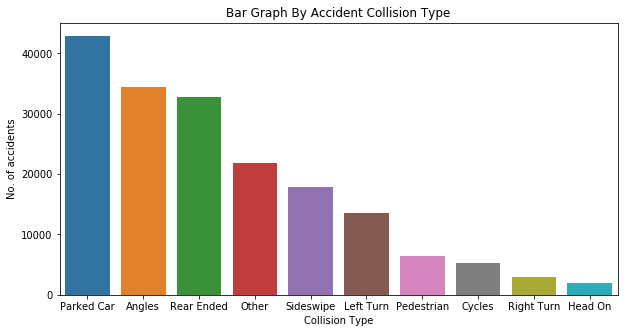

In [11]:
collision_counts = df_collision_data['COLLISIONTYPE'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(collision_counts.index,collision_counts.values)
plt.title('Bar Graph By Accident Collision Type')
plt.xlabel('Collision Type')
plt.ylabel('No. of accidents')
plt.show()


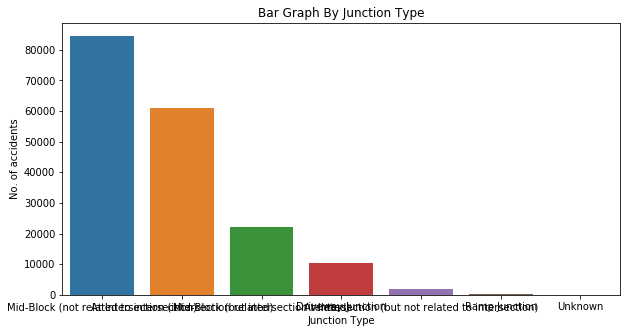

In [12]:
junction_counts = df_collision_data['JUNCTIONTYPE'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(junction_counts.index,junction_counts.values)
plt.title('Bar Graph By Junction Type')
plt.xlabel('Junction Type')
plt.ylabel('No. of accidents')
plt.show()


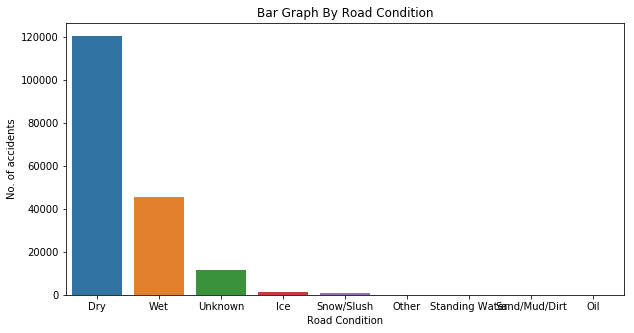

In [13]:
road_counts = df_collision_data['ROADCOND'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(road_counts.index,road_counts.values)
plt.title('Bar Graph By Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('No. of accidents')
plt.show()

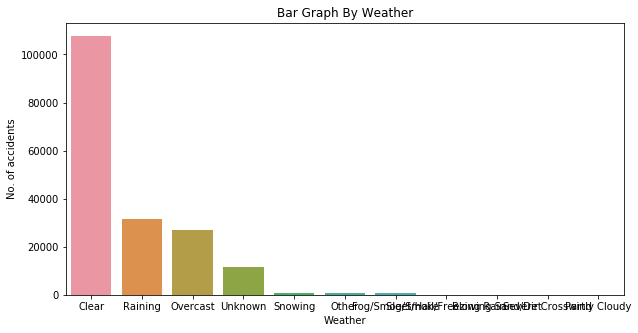

In [14]:
weather_counts = df_collision_data['WEATHER'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(weather_counts.index,weather_counts.values)
plt.title('Bar Graph By Weather')
plt.xlabel('Weather')
plt.ylabel('No. of accidents')
plt.show()

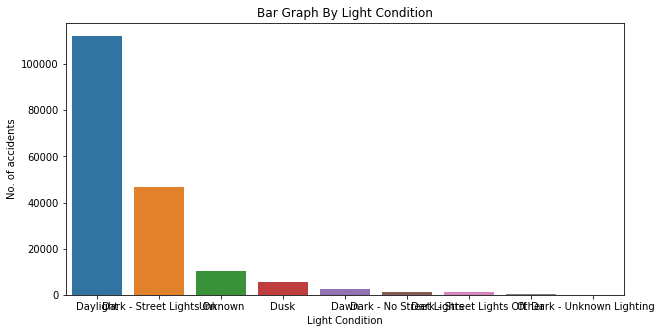

In [15]:
light_counts = df_collision_data['LIGHTCOND'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(light_counts.index,light_counts.values)
plt.title('Bar Graph By Light Condition')
plt.xlabel('Light Condition')
plt.ylabel('No. of accidents')
plt.show()

Converting various categorical variables into numerical variables for the purpose of statistical calculations.

In [16]:
df_collision_data['JUNCTIONTYPE'].replace(to_replace=['At Intersection (but not related to intersection)','At Intersection (intersection related)','Driveway Junction','Mid-Block (but intersection related)','Mid-Block (not related to intersection)','Ramp Junction','Unknown'], value=[1,2,3,4,5,6,7],inplace=True)
df_collision_data['WEATHER'].replace(to_replace=['Blowing Sand/Dirt','Clear','Fog/Smog/Smoke','Other','Overcast','Partly Cloudy','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing','Unknown'], value=[1,2,3,4,5,6,7,8,9,10,11],inplace=True)
df_collision_data['ROADCOND'].replace(to_replace=['Dry','Ice','Oil','Other','Sand/Mud/Dirt','Snow/Slush','Standing Water','Unknown','Wet'], value=[1,2,3,4,5,6,7,8,9],inplace=True)
df_collision_data['LIGHTCOND'].replace(to_replace=['Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dark - Unknown Lighting','Dawn','Daylight','Dusk','Other','Unknown'], value=[1,2,3,4,5,6,7,8,9],inplace=True)
df_collision_data['COLLISIONTYPE'].replace(to_replace=['Angles','Cycles','Head On','Left Turn','Other','Parked Car','Pedestrian','Rear Ended','Right Turn','Sideswipe'], value=[1,2,3,4,5,6,7,8,9,10],inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [17]:
df_collision_data.head()

,X,Y,LOCATION,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,-122.323148,47.703140,5TH AVE NE AND NE 103RD ST,1,2,2,2,5,9,6,2
1,-122.347294,47.647172,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,10,2,2,5,7,9,3,1
2,-122.334540,47.607871,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,6,4,3,5,5,1,6,1
3,-122.334803,47.604803,2ND AVE BETWEEN MARION ST AND MADISON ST,5,3,3,5,2,1,6,1
4,-122.306426,47.545739,SWIFT AVE S AND SWIFT AV OFF RP,1,2,2,2,7,9,6,2


In [18]:
df_collision_data.describe()

,X,Y,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
count,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000
mean,-122.330462,47.619501,5.467259,2.479405,1.974498,3.702644,3.957444,3.508872,5.350253,1.309935
std,0.029977,0.056331,2.824588,1.369008,0.560060,1.377250,2.730150,3.630853,1.665606,0.462468
min,-122.419091,47.495573,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,-122.348640,47.575576,4.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000
50%,-122.330168,47.615282,6.000000,2.000000,2.000000,4.000000,2.000000,1.000000,6.000000,1.000000
75%,-122.311926,47.663939,8.000000,3.000000,2.000000,5.000000,5.000000,9.000000,6.000000,2.000000
max,-122.238949,47.734142,10.000000,81.000000,12.000000,7.000000,11.000000,9.000000,9.000000,2.000000


<h3>Feature Selection/Extraction</h3>

In [19]:
Feature = df_collision_data[['COLLISIONTYPE','PERSONCOUNT','VEHCOUNT','JUNCTIONTYPE','ROADCOND','WEATHER','LIGHTCOND']]
Feature.head()

,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,ROADCOND,WEATHER,LIGHTCOND
0,1,2,2,2,9,5,6
1,10,2,2,5,9,7,3
2,6,4,3,5,1,5,6
3,5,3,3,5,1,2,6
4,1,2,2,2,9,7,6


In [20]:
X = Feature
y = df_collision_data['SEVERITYCODE']
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X[0:5])
print(y[0:5])

[[-1.58156601 -0.35018524  0.04553381 -1.23626698  1.51235645  0.38186893
   0.39009757]
 [ 1.60474864 -0.35018524  0.04553381  0.94199277  1.51235645  1.11443158
  -1.4110537 ]
 [ 0.18860879  1.11073119  1.8310602   0.94199277 -0.69098882  0.38186893
   0.39009757]
 [-0.16542617  0.38027298  1.8310602   0.94199277 -0.69098882 -0.71697504
   0.39009757]
 [-1.58156601 -0.35018524  0.04553381 -1.23626698  1.51235645  1.11443158
   0.39009757]]
0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


This is a classification problem as I need to predict whether the accident severity is of a particular type. Hence, I’ve applied various classification algorithms like K Nearest Neighbors, Decision Tree, Support Vector Machine and Logistic Regression.
<h3>Building Classification Models</h3>
First, I've split the data into training and testing data.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (144053, 7) (144053,)
Test set: (36014, 7) (36014,)


Then, I applied the classification algorithms like Decision Tree, K Nearest Neighbors, Support Vector Machine and Logistic Regression to the data.
<h4>Decision Tree Algorithm</h4>

In [22]:
#importing metrics to evaluate the built models.
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [23]:
#import decision tree
from sklearn import tree

#fit Decision Tree model for training data
deciTree = tree.DecisionTreeClassifier()
deciTree = deciTree.fit(X_train,y_train)

#predict severity for training data
dt_y_train = deciTree.predict(X_train)
deciTree_train_f1score = f1_score(y_train,dt_y_train,average='weighted')
deciTree_train_jaccard = jaccard_similarity_score(y_train,dt_y_train)
print("Training Data: f1 score=",deciTree_train_f1score,", Jaccard Similarity score=",deciTree_train_jaccard)

#predict severity for test data
dt_y_test = deciTree.predict(X_test)
deciTree_test_f1score = f1_score(y_test,dt_y_test,average='weighted')
deciTree_test_jaccard = jaccard_similarity_score(y_test,dt_y_test)
print("Test Data: f1 score=",deciTree_test_f1score,", Jaccard Similarity score=",deciTree_test_jaccard)
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, dt_y_test, labels=[1,2]))
print("Classification Repoert")
print(metrics.classification_report(y_test, dt_y_test, labels=[1,2]))

Training Data: f1 score= 0.7392819014467409 , Jaccard Similarity score= 0.7680228804676057
Test Data: f1 score= 0.7064711463237354 , Jaccard Similarity score= 0.7391014605431221
Confusion Matrix
[[23039  1747]
 [ 7649  3579]]
Classification Repoert
              precision    recall  f1-score   support

           1       0.75      0.93      0.83     24786
           2       0.67      0.32      0.43     11228

   micro avg       0.74      0.74      0.74     36014
   macro avg       0.71      0.62      0.63     36014
weighted avg       0.73      0.74      0.71     36014



<h4>K Nearest Neighbors</h4>

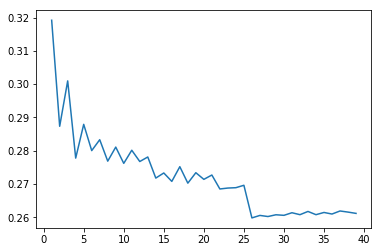

In [24]:
#Visualising KNN actual vs predicted severity to decide the best k between 1 and 20
from sklearn.neighbors import KNeighborsClassifier

error = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(np.mean(y_pred != y_test))
    
plt.plot(range(1,40), error)

From the graph, it appears that the error is minimum at k = 26. Hence, let's fit the KNN with 14

In [25]:
#fit KNN model for training data
knear = KNeighborsClassifier(n_neighbors=26)
knear.fit(X_train,y_train)
knear_y_train = knear.predict(X_train)

#predict severity for training data
knn_train_f1score = f1_score(y_train,knear_y_train,average='weighted')
knn_train_jaccard = jaccard_similarity_score(y_train,knear_y_train)
print("Training Data: f1 score=",knn_train_f1score,", Jaccard Similarity Score=",knn_train_jaccard)

#predict severity for test data
knear_y_test = knear.predict(X_test)
knn_test_f1score = f1_score(y_test,knear_y_test,average='weighted')
knn_test_jaccard = jaccard_similarity_score(y_test,knear_y_test)
print("Test Data: f1 score=",knn_test_f1score,", Jaccard Similarity Score=",knn_test_jaccard)
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, knear_y_test, labels=[1,2]))
print("Classification Repoert")
print(metrics.classification_report(y_test, knear_y_test, labels=[1,2]))

Training Data: f1 score= 0.712563211731677 , Jaccard Similarity Score= 0.7509597162155596
Test Data: f1 score= 0.7002450393735417 , Jaccard Similarity Score= 0.7401843727439329
Confusion Matrix
[[23466  1320]
 [ 8037  3191]]
Classification Repoert
              precision    recall  f1-score   support

           1       0.74      0.95      0.83     24786
           2       0.71      0.28      0.41     11228

   micro avg       0.74      0.74      0.74     36014
   macro avg       0.73      0.62      0.62     36014
weighted avg       0.73      0.74      0.70     36014



<h4>Support Vector Machine</h4>

In [26]:
#import svm
from sklearn import svm

#fit SVM model for training data
supVecMac = svm.SVC(kernel='rbf')
supVecMac.fit(X_train,y_train)

#predict severity for training data
svm_y_train=supVecMac.predict(X_train)
supVecMac_train_f1score = f1_score(y_train,svm_y_train,average='weighted')
supVecMac_train_jaccard = jaccard_similarity_score(y_train,svm_y_train)
print("Training Data: f1 Score=",supVecMac_train_f1score,", Jaccard Similarity Score=",supVecMac_train_jaccard)

#predict severity for test data
svm_y_test=supVecMac.predict(X_test)
supVecMac_test_f1score = f1_score(y_test,svm_y_test,average='weighted')
supVecMac_test_jaccard = jaccard_similarity_score(y_test,svm_y_test)
print("Test Data: f1 Score=",supVecMac_test_f1score,", Jaccard Similarity Score=",supVecMac_test_jaccard)
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, svm_y_test, labels=[1,2]))
print("Classification Repoert")
print(metrics.classification_report(y_test, svm_y_test, labels=[1,2]))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training Data: f1 Score= 0.7034976589663473 , Jaccard Similarity Score= 0.7496615828896309
Test Data: f1 Score= 0.6968811495868447 , Jaccard Similarity Score= 0.7440995168545566
Confusion Matrix
[[23922   864]
 [ 8352  2876]]
Classification Repoert
              precision    recall  f1-score   support

           1       0.74      0.97      0.84     24786
           2       0.77      0.26      0.38     11228

   micro avg       0.74      0.74      0.74     36014
   macro avg       0.76      0.61      0.61     36014
weighted avg       0.75      0.74      0.70     36014



<h4>Logistic Regression</h4>

In [27]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
#fit a logistic regression model for training data
logReg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

#predict severity for training data
lr_y_train = logReg.predict(X_train)
y_train_prb = logReg.predict_proba(X_train)
logReg_train_f1score = f1_score(y_train,lr_y_train,average='weighted')
logReg_train_jaccard = jaccard_similarity_score(y_train,lr_y_train)
logReg_train_logloss = log_loss(y_train,y_train_prb)
print("Training Data: f1 Score=",logReg_train_f1score,", Jaccard Similarity score=",logReg_train_jaccard,"LogLoss score=",logReg_train_logloss)

#predicting severity for test data
lr_y_test = logReg.predict(X_test)
y_test_prb = logReg.predict_proba(X_test)
logReg_test_f1score = f1_score(y_test,lr_y_test,average='weighted')
logReg_test_jaccard = jaccard_similarity_score(y_test,lr_y_test)
logReg_test_logloss = log_loss(y_test,y_test_prb)
print("Training Data: LogReg f1 Score=",logReg_test_f1score,", Jaccard Similarity score=",logReg_test_jaccard,"LogLoss score=",logReg_test_logloss)
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_y_test, labels=[1,2]))
print("Classification Repoert")
print(metrics.classification_report(y_test, lr_y_test, labels=[1,2]))

Training Data: f1 Score= 0.6496196135258749 , Jaccard Similarity score= 0.7114464815033356 LogLoss score= 0.5787508172008262
Training Data: LogReg f1 Score= 0.6463063679188583 , Jaccard Similarity score= 0.7078636085966569 LogLoss score= 0.5806141522570069
Confusion Matrix
[[23563  1223]
 [ 9298  1930]]
Classification Repoert
              precision    recall  f1-score   support

           1       0.72      0.95      0.82     24786
           2       0.61      0.17      0.27     11228

   micro avg       0.71      0.71      0.71     36014
   macro avg       0.66      0.56      0.54     36014
weighted avg       0.68      0.71      0.65     36014



<h2>Conclusion:</h2>

<ul>
    <li>Accidents happened almost all over the city. Most of these accidents resulted in property damage, while the others lead to injuries.</li>
    <li>Interestingly, most of the accidents happened in Clear weather, Daylight and on dry roads. A significant number of accidents happened on wet roads when it was raining or it was an overcast sky.</li>
    <li>Most of the accidents happened at road intersections. </li>
    <li>The number of accidents varied more based on the type of collision. Hitting parked cars, angular hits and rear end hits were the most significant accident cases.</li>
    <li>Best fit model: Support Vector Machine with an average precision of 75%.</li>
</ul>